In [32]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

def display_img(img, title):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Load an image from file
img_path = "D:\_IITM_ZNZ\Short_Course_CV_IVP_2024\standard_test_images/"

4.9.0


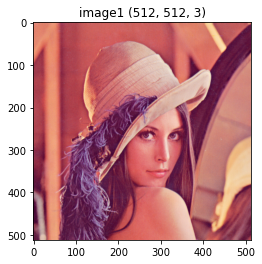

In [33]:
# Example usage
image = cv2.imread(img_path + 'lena_color_512.tif')

display_img(image, 'image1 ' + str(image.shape))

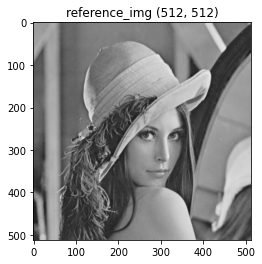

In [34]:
# Convert the image to grayscale
reference_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

display_img(reference_img, 'reference_img ' + str(reference_img.shape))

In [35]:
import math

def calculate_entropy(probabilities):
    entropy = 0
    for prob in probabilities:
        if prob != 0:
            entropy -= prob * math.log2(prob)
    return entropy

def calculate_redundancy(entropy, probabilities):
    # Maximum entropy occurs when all outcomes are equally likely
    max_entropy = math.log2(len(probabilities))
    redundancy = max_entropy - entropy
    return redundancy

# Example probabilities for a discrete random variable
probabilities = [0.125, 0.375, 0.5]

# Calculate entropy
entropy = calculate_entropy(probabilities)
print("Entropy:", entropy, "bits")

# Calculate redundancy
redundancy = calculate_redundancy(entropy, probabilities)
print("Redundancy:", redundancy, "bits")

Entropy: 1.4056390622295665 bits
Redundancy: 0.1793234384915896 bits


In [36]:
import numpy as np

def dpcm_encode(image):
    image = np.int16(image)
    height, width = image.shape
    encoded_image = np.zeros((height, width), dtype=np.int16)
    predicted_value = 0
    
    for i in range(height):
        for j in range(width):
            prediction_error = image[i, j] - predicted_value
            encoded_image[i, j] = prediction_error
            predicted_value = image[i, j]  # Update predicted value for next iteration
            
    return encoded_image

def dpcm_decode(encoded_image):
    height, width = encoded_image.shape
    decoded_image = np.zeros((height, width), dtype=np.uint8)
    predicted_value = 0
    
    for i in range(height):
        for j in range(width):
            predicted_value += encoded_image[i, j]
            decoded_image[i, j] = predicted_value
            predicted_value = decoded_image[i, j]  # Update predicted value for next iteration
            
    return decoded_image

# Encode the image using DPCM
encoded_image = dpcm_encode(reference_img)
print("Encoded Image shape: ", encoded_image.shape)

# Decode the encoded image
decoded_image = dpcm_decode(encoded_image)
print("\nDecoded Image shape: ", decoded_image.shape)

Encoded Image shape:  (512, 512)

Decoded Image shape:  (512, 512)


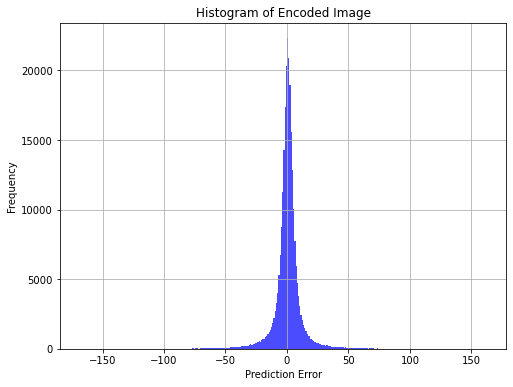

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the encoded image into a 1D array
encoded_image_flat = encoded_image.flatten()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(encoded_image_flat, bins=range(min(encoded_image_flat), max(encoded_image_flat) + 1), color='blue', alpha=0.7)
plt.title('Histogram of Encoded Image')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [38]:
def compute_entropy(data):
    unique_values, value_counts = np.unique(data, return_counts=True)
    probability_distribution = value_counts / len(data)
    entropy = -np.sum(probability_distribution * np.log2(probability_distribution))
    return entropy

# Assuming encoded_image_flat is the flattened encoded image obtained from DPCM
entropy = compute_entropy(encoded_image_flat)
print("Entropy of Encoded Image:", entropy)

Entropy of Encoded Image: 5.064263907204886


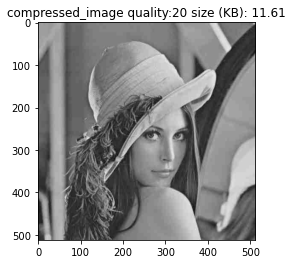

In [43]:
import os

# Define JPEG compression quality (0-100)
compression_quality = 20

# Compress the image using JPEG compression
cv2.imwrite('compressed_image.jpg', reference_img, [int(cv2.IMWRITE_JPEG_QUALITY), compression_quality])

# Load the compressed image to verify
compressed_image = cv2.imread('compressed_image.jpg')
# Get the size of the compressed image file in bytes
compressed_image_size_bytes = os.path.getsize('compressed_image.jpg')
size_KB = round(compressed_image_size_bytes/1024, 2)

display_img(compressed_image, 'compressed_image quality:' + str(compression_quality) + ' size (KB): ' + str(size_KB))